In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import math

df = pd.read_csv('AttendanceMarksSA.csv')

# Correlation Analysis

In [4]:
corr=df.corr()
corr.style.background_gradient(cmap='coolwarm')

C:\Users\public\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MSE', ylabel='ESE'>

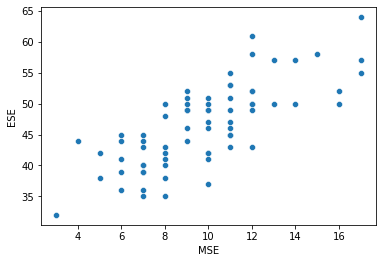

In [5]:
X = df["MSE"]
y = df["ESE"]

sns.scatterplot(X ,y)

# Pre-processing

In [6]:
endog = df['ESE']
exog = sm.add_constant(df[['MSE']])
print(exog)

    const  MSE
0     1.0   10
1     1.0    7
2     1.0    3
3     1.0   16
4     1.0    9
..    ...  ...
68    1.0   10
69    1.0    8
70    1.0    9
71    1.0   11
72    1.0   12

[73 rows x 2 columns]


# Model Building

In [7]:
# Fit and summarize OLS model
mod = sm.OLS(endog, exog)
results = mod.fit()
print (results.summary())

                            OLS Regression Results                            
Dep. Variable:                    ESE   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     92.14
Date:                Wed, 29 Dec 2021   Prob (F-statistic):           1.85e-14
Time:                        16:12:55   Log-Likelihood:                -210.66
No. Observations:                  73   AIC:                             425.3
Df Residuals:                      71   BIC:                             429.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.6664      1.741     17.616      0.0

In [8]:
def RSE(y_true, y_predicted):
   
    y_true = np.array(y_true)
    y_predicted = np.array(y_predicted)
    RSS = np.sum(np.square(y_true - y_predicted))

    rse = math.sqrt(RSS / (len(y_true) - 2))
    return rse

In [9]:
rse= RSE(df['ESE'],results.predict())
print(rse)

4.396224549647787


# Intepreting the result of Model One

C:\Users\public\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Attendance', ylabel='ESE'>

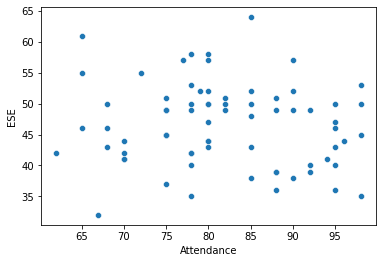

In [10]:
X1 = df["Attendance"]
y1 = df["ESE"]

sns.scatterplot(X1 ,y1)

In [11]:
endog1 = df['ESE']
exog1 = sm.add_constant(df[['Attendance']])
print(exog)

    const  MSE
0     1.0   10
1     1.0    7
2     1.0    3
3     1.0   16
4     1.0    9
..    ...  ...
68    1.0   10
69    1.0    8
70    1.0    9
71    1.0   11
72    1.0   12

[73 rows x 2 columns]


In [12]:
# Fit and summarize OLS model
mod1 = sm.OLS(endog1, exog1)
results1 = mod1.fit()
print (results1.summary())

                            OLS Regression Results                            
Dep. Variable:                    ESE   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.8692
Date:                Wed, 29 Dec 2021   Prob (F-statistic):              0.354
Time:                        16:15:12   Log-Likelihood:                -240.58
No. Observations:                  73   AIC:                             485.2
Df Residuals:                      71   BIC:                             489.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         52.8841      6.753      7.831      0.0

# Intepreting the result of Second Model: